In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [11]:
df = pd.read_csv("C:/Infosys Internship/Datasets/Finalized Dataset/diabetes_prediction_dataset.csv")

In [12]:
ohe_encoder=OneHotEncoder(sparse_output=False,drop='first').set_output(transform='pandas')
std_scaler=StandardScaler()

In [13]:
Nominal_Col=['gender','smoking_history']
Nominal_transformed_df=ohe_encoder.fit_transform(df[Nominal_Col])
df=pd.concat([df,Nominal_transformed_df],axis=1).drop(columns=Nominal_Col)

In [14]:
Std_cols=['age','bmi','HbA1c_level','blood_glucose_level']
df[Std_cols]=std_scaler.fit_transform(df[Std_cols])

In [15]:
X=df.drop(columns=['diabetes'])
y=df['diabetes']

In [16]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=0.33,random_state=42,
                                              stratify=y)

smote=SMOTE(random_state=42,sampling_strategy=0.3)
X_train_res,y_train_res=smote.fit_resample(X_train,y_train)

In [18]:
model = XGBClassifier(random_state=42)

In [19]:
model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

print("XGBoost Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

XGBoost Model Performance:
Accuracy: 0.9704242424242424

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     30195
           1       0.93      0.71      0.80      2805

    accuracy                           0.97     33000
   macro avg       0.95      0.85      0.89     33000
weighted avg       0.97      0.97      0.97     33000



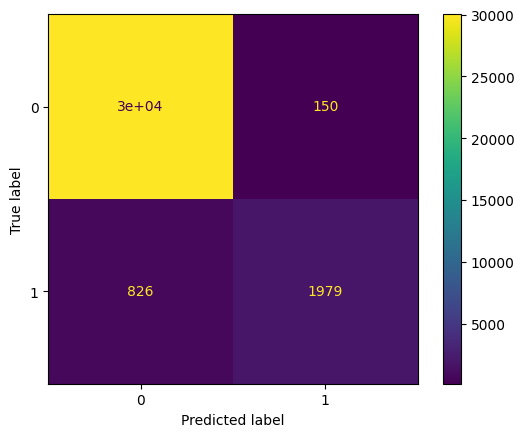

In [22]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

##### Now Balancing the imbalanced dataset

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb


In [40]:
# Training the XGBoost model with scale_pos_weight for handling class imbalance
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [41]:
# Making predictions
y_pred = model.predict(X_test)


In [46]:
# Displaying the updated model performance metrics
print("\nUpdated XGBoost Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred)) 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))  


Updated XGBoost Model Performance:
Accuracy: 0.9267272727272727

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     30195
           1       0.54      0.88      0.67      2805

    accuracy                           0.93     33000
   macro avg       0.77      0.91      0.82     33000
weighted avg       0.95      0.93      0.93     33000



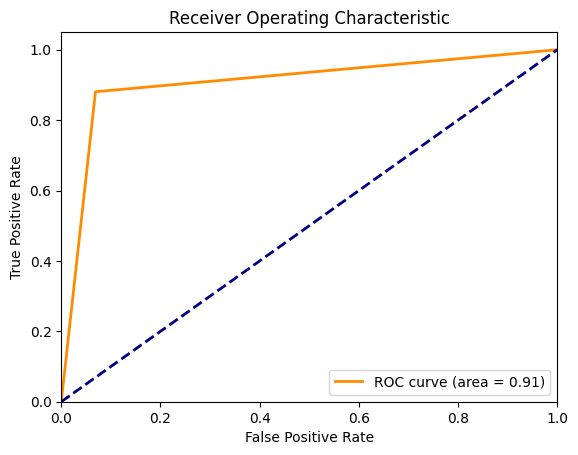

In [47]:
# Ploting the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)  # To Calculate false positive & true positive rates
roc_auc = auc(fpr, tpr)  # To Calculate the area under the curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)  
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])  # Setting x-axis limits
plt.ylim([0.0, 1.05])  # Setting y-axis limits
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")   
plt.show()


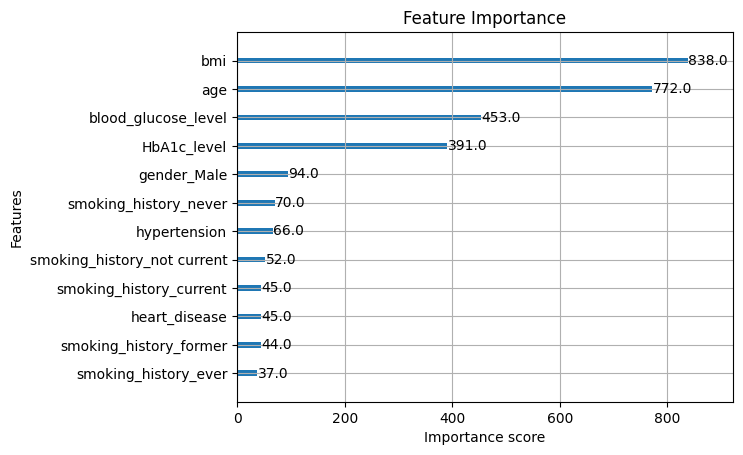

In [48]:
# Ploting the feature importance
xgb.plot_importance(model)  # Visualize feature importance
plt.title('Feature Importance')
plt.show()


In [49]:
# Generate the confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Confusion Matrix:
[[28112  2083]
 [  335  2470]]


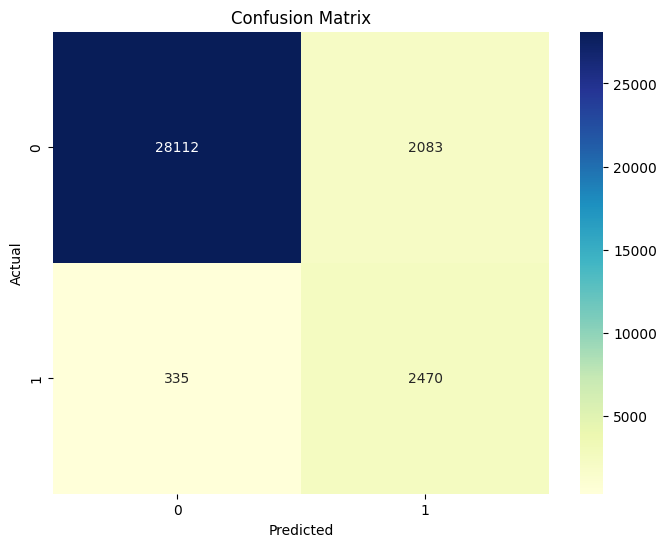

In [50]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))  
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')  
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
